In [2]:
import xarray as xr
import numpy as np 

In [48]:
ds = xr.open_dataset(r"C:\Users\Ankit\Downloads\updated_viirs_binary_fire_2015_2016.nc")
ds.data_vars

Data variables:
    fire_label  (time, latitude, longitude) uint8 4MB ...

In [49]:
list(ds.fire_label.values)

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [

In [50]:
test_time = pd.Timestamp("2016-12-30 08:00:00")

In [51]:
times = pd.to_datetime(ds.time.values)

In [52]:
if test_time not in times:
    raise ValueError("Test time not found in the dataset")

time_idx = np.where(times == test_time)[0][0]

In [53]:
raster = ds.fire_label[time_idx, :, :].values

In [58]:
print(raster.shape)

(13, 17)


In [59]:
fire_lats, fire_lons = np.where(raster == 1)
lat = ds.latitude.values
lon = ds.longitude.values

fire_lat_coords = lat[fire_lats]
fire_lon_coords = lon[fire_lons]

In [72]:
(fire_lat_coords,fire_lon_coords)

(array([31.25, 30.  , 30.  , 30.  , 29.75, 29.75, 29.75, 29.75, 29.75,
        29.5 , 29.5 , 29.5 , 29.5 , 29.5 , 29.25, 29.25, 29.25, 29.25,
        29.25, 29.25, 29.  , 29.  , 29.  , 29.  , 29.  , 29.  , 29.  ,
        28.75, 28.75, 28.75, 28.75, 28.75, 28.75, 28.5 , 28.5 , 28.5 ,
        28.5 ]),
 array([78.  , 77.25, 77.5 , 77.75, 77.  , 77.25, 77.5 , 77.75, 78.  ,
        77.5 , 77.75, 78.  , 78.25, 78.5 , 77.25, 77.5 , 77.75, 78.  ,
        78.5 , 79.  , 77.25, 77.5 , 77.75, 78.  , 78.5 , 78.75, 79.5 ,
        77.25, 77.5 , 77.75, 79.5 , 80.25, 80.5 , 78.  , 78.75, 79.  ,
        80.5 ]))

In [61]:
ds1 = xr.open_dataset(r"C:\Users\Ankit\Downloads\compressed_cleaned_era5_2015_2016.nc")

In [62]:
ds1.data_vars

Data variables:
    t2m      (valid_time, latitude, longitude) float32 16MB ...
    d2m      (valid_time, latitude, longitude) float32 16MB ...
    u10      (valid_time, latitude, longitude) float32 16MB ...
    v10      (valid_time, latitude, longitude) float32 16MB ...
    tp       (valid_time, latitude, longitude) float32 16MB ...

In [63]:
lat = ds.latitude.values
lon = ds.longitude.values

In [64]:
lat1 = ds1.latitude.values
lon1 = ds1.longitude.values

In [65]:
time_index = 0 # or use .sel(time="2015-06-01 12:00")
fire_slice = ds["fire_label"].isel(time=time_index)

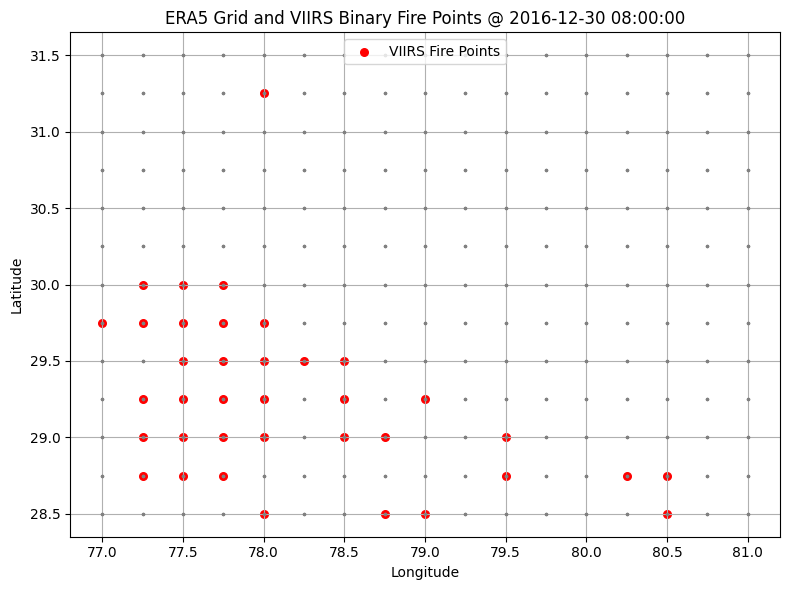

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for lat in lat1:
    plt.plot(lon1, [lat]*len(lon1), marker='.', color='gray', markersize=3, linestyle='none')
for lon in lon1:
    plt.plot([lon]*len(lat1), lat1, marker='.', color='gray', markersize=3, linestyle='none')
plt.scatter(fire_lon_coords, fire_lat_coords, c='red', s=30, label="VIIRS Fire Points")
plt.title(f"ERA5 Grid and VIIRS Binary Fire Points @ {test_time}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
#now through this plot we can confirm that yes with VIIRS_binary_raster , it is working

In [75]:
#now data cleaning